**Table of contents**<a id='toc0_'></a>    
- 1. [tensorflow工作原理](#toc1_)    
- 2. [数据操作](#toc2_)    
  - 2.1. [张量（tensor）](#toc2_1_)    
  - 2.2. [运算符](#toc2_2_)    
  - 2.3. [广播机制](#toc2_3_)    
  - 2.4. [切片和索引](#toc2_4_)    
- 3. [tensorflow v1.3](#toc3_)    
  - 3.1. [构建计算图并计算相应梯度](#toc3_1_)    
  - 3.2. [使用占位符](#toc3_2_)    
  - 3.3. [变量](#toc3_3_)    
    - 3.3.1. [定义和初始化变量](#toc3_3_1_)    
    - 3.3.2. [变量范围](#toc3_3_2_)    
    - 3.3.3. [变量复用](#toc3_3_3_)    
  - 3.4. [建立回归模型](#toc3_4_)    
    - 3.4.1. [存储和恢复模型参数](#toc3_4_1_)    
      - 3.4.1.1. [存储](#toc3_4_1_1_)    
      - 3.4.1.2. [恢复](#toc3_4_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[tensorflow工作原理](#toc0_)
```
核心在于：构建计算图，并用计算图推导从输入到输出所有张量之间的关系；
计算图：就是网络节点，每一个节点就是一个操作，将函数应用到输入的张量上，然后返回0个或更多个张量作为输出；
```

In [ ]:
import tensorflow as tf

# Check version
print(f"Trnsorflow version: {tf.__version__}")

# Test TensorFlow for cuda availibility
print("Tensorflow is built with CUDA: ", tf.test.is_built_with_cuda())

Trnsorflow version: 1.3.0
Tensorflow is built with CUDA:  False


# 2. <a id='toc2_'></a>[数据操作](#toc0_)
```
tf.constant() # 常量
tf.range()
tf.reshape()
```
## 2.1. <a id='toc2_1_'></a>[张量（tensor）](#toc0_)

In [4]:
tf.constant([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]]) # 常数

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[2, 1, 4, 3],
       [1, 2, 3, 4],
       [4, 3, 2, 1]])>

In [3]:
x = tf.range(12)
x

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])>

In [14]:
x.device # tensor布置在CPU上

'/job:localhost/replica:0/task:0/device:CPU:0'

In [23]:
x.shape

TensorShape([12])

In [24]:
tf.size(x)

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In [27]:
x1 = tf.reshape(x, (3,4))
x1

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])>

In [28]:
tf.zeros((2, 3, 4))

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)>

In [29]:
tf.ones((2, 3, 4))

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)>

In [30]:
tf.random.normal((3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 0.53618914, -0.06235417, -0.6402013 ,  0.8834732 ],
       [-0.8167473 ,  1.6744276 ,  1.5813441 , -0.11632893],
       [-1.5228316 , -0.06479645, -0.06996424, -0.43961218]],
      dtype=float32)>

## 2.2. <a id='toc2_2_'></a>[运算符](#toc0_)

In [35]:
# create tensor from list format of python
x = tf.constant([1.0, 2, 4, 8])
y = tf.constant([2.0, 2, 2, 2])
x, y

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 2., 4., 8.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([2., 2., 2., 2.], dtype=float32)>)

In [34]:
x + y, x - y, x * y, x / y, x ** y  # **运算符是求幂运算

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 3.,  4.,  6., 10.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([-1.,  0.,  2.,  6.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 2.,  4.,  8., 16.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.5, 1. , 2. , 4. ], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 1.,  4., 16., 64.], dtype=float32)>)

In [ ]:
tf.add()
tf.substr()
tf.multiply()
tf.divide()
tf.square()
tf.pow()
tf.sqrt()
tf.matmul()

In [36]:
tf.exp(x)

<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([2.7182817e+00, 7.3890562e+00, 5.4598148e+01, 2.9809580e+03],
      dtype=float32)>

In [37]:
X = tf.reshape(tf.range(12, dtype=tf.float32), (3, 4))
X

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]], dtype=float32)>

In [38]:
Y = tf.constant([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
Y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[2., 1., 4., 3.],
       [1., 2., 3., 4.],
       [4., 3., 2., 1.]], dtype=float32)>

In [39]:
tf.concat([X, Y], axis=0), tf.concat([X, Y], axis=1) # concatate two tensor

(<tf.Tensor: shape=(6, 4), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 8), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]], dtype=float32)>)

In [40]:
X == Y # 判断

<tf.Tensor: shape=(3, 4), dtype=bool, numpy=
array([[False,  True, False,  True],
       [False, False, False, False],
       [False, False, False, False]])>

## 2.3. <a id='toc2_3_'></a>[广播机制](#toc0_)

In [41]:
a = tf.reshape(tf.range(3), (3, 1))
b = tf.reshape(tf.range(2), (1, 2))
a, b

(<tf.Tensor: shape=(3, 1), dtype=int32, numpy=
 array([[0],
        [1],
        [2]])>,
 <tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[0, 1]])>)

In [42]:
a + b # 行和列都扩大了

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 2],
       [2, 3]])>

## 2.4. <a id='toc2_4_'></a>[切片和索引](#toc0_)
就像在任何其他Python数组中一样，张量中的元素可以通过索引访问。 与任何Python数组一样：第一个元素的索引是0，最后一个元素索引是-1； 可以指定范围以包含第一个元素和最后一个之前的元素。

如下所示，我们可以用[-1]选择最后一个元素，可以用[1:3]选择第二个和第三个元素  

TensorFlow中的Tensors是不可变的，也不能被赋值。 TensorFlow中的Variables是支持赋值的可变容器。 请记住，TensorFlow中的梯度不会通过Variable反向传播。

除了为整个Variable分配一个值之外，我们还可以通过索引来写入Variable的元素。
Variables是TensorFlow中的可变容器，它们提供了一种存储模型参数的方法。 我们可以通过assign将一个操作的结果分配给一个Variable。 

In [43]:
X_var = tf.Variable(X)
X_var

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]], dtype=float32)>

In [44]:
X_var[1, 2].assign(9) # 赋值为9
X_var

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  9.,  7.],
       [ 8.,  9., 10., 11.]], dtype=float32)>

In [45]:
X_var[0:2, :].assign(tf.ones(X_var[0:2,:].shape, dtype = tf.float32) * 12) # 多元素赋值
X_var

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[12., 12., 12., 12.],
       [12., 12., 12., 12.],
       [ 8.,  9., 10., 11.]], dtype=float32)>

In [4]:
# 强制转格式
tf.cast(3, dtype=tf.float32)

<tf.Tensor 'Cast_1:0' shape=() dtype=float32>

In [ ]:
tf.reduce_min()
tf.reduce_max()


# 3. <a id='toc3_'></a>[tensorflow v1.3](#toc0_)
## 3.1. <a id='toc3_1_'></a>[构建计算图并计算相应梯度](#toc0_)

In [4]:
import tensorflow as tf # v1.3

g = tf.Graph()                              # 1. 初始化空白计算图
with g.as_default():                        # 2. 为该图增加节点（张量和操作）
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    z = 2*(a-b) + c

with tf.Session(graph=g) as sess:           # 3. 开始一个新的会话
    print(f"2*(a-b)+c => {sess.run(z)}")    # 4. 初始化图中的变量； 5. 运行会话的计算图

2*(a-b)+c => 1


## 3.2. <a id='toc3_2_'></a>[使用占位符](#toc0_)
```
tf.placeholder()

sess.run(...,feed_dict={placeholder1:x, placehoder1:y, ...})
```

In [8]:
import tensorflow as tf # v1.3

g= tf.Graph()
with g.as_default():
    tf_a = tf.placeholder(tf.int32, shape=[], name='tf_a')
    tf_b = tf.placeholder(tf.int32, shape=[], name='tf_b')
    tf_c = tf.placeholder(tf.int32, shape=[], name='tf_c')
    r1 = tf_a - tf_b
    r2 = 2*r1
    z = r1 + tf_c

with tf.Session(graph=g) as sess:
    feed = {tf_a:1,
            tf_b:2,
            tf_c:3}
    print(f"z: {sess.run(z, feed)}") # 需要feed_dict

z: 2


## 3.3. <a id='toc3_3_'></a>[变量](#toc0_)
```
tf.Variable()
tf.get_variable(name) # 允许复用现有变量，这些变量已经采用常用的Xavier/Glorot默认的初始化方案

tf.global_variables_initializer() # 进行变量初始化
```
### 3.3.1. <a id='toc3_3_1_'></a>[定义和初始化变量](#toc0_)

In [12]:
import tensorflow as tf
import numpy as np

g1 = tf.Graph()
with g1.as_default():
    w = tf.Variable(np.arange(1, 9).reshape(2,4), name='w') # 定义变量，虽然赋值了但没有分配内存空间，直到开始会话并执行
    print(w)

with tf.Session(graph=g1) as sess:
    sess.run(tf.global_variables_initializer()) # 通过tf.global_variables_initializer()初始化图中所有变量
                                                # 必须在所有变量都定义完后再执行初始化，否则未被初始化的变量在被调用时会出错
    print(sess.run(w)) # 此时才能打印出数值

<tf.Variable 'w:0' shape=(2, 4) dtype=int32_ref>
[[1 2 3 4]
 [5 6 7 8]]


### 3.3.2. <a id='toc3_3_2_'></a>[变量范围](#toc0_)
```
with tf.variable_scope('net_a'):
    pass
    with tf.variable_scope('layer_1'):
        pass
```

In [18]:
import tensorflow as tf # v1.3

g = tf.Graph()
with g.as_default():
    with tf.variable_scope('net_A'):
        with tf.variable_scope('layer_1'):
            w1 = tf.Variable(tf.random_normal(shape=(10,4)), name='weights')
        with tf.variable_scope('layer_2'):
            w2 = tf.Variable(tf.random_normal(shape=(20,10)), name='weights')

    with tf.variable_scope('net_B'):
        with tf.variable_scope('layer_1'):
            w3 = tf.Variable(tf.random_normal(shape=(10,4)), name='weights')
        with tf.variable_scope('layer_2'):
            w4 = tf.Variable(tf.random_normal(shape=(20,10)), name='weights')

    print(w1, w2, w3, w4, sep='\n')

<tf.Variable 'net_A/layer_1/weights:0' shape=(10, 4) dtype=float32_ref>
<tf.Variable 'net_A/layer_2/weights:0' shape=(20, 10) dtype=float32_ref>
<tf.Variable 'net_B/layer_1/weights:0' shape=(10, 4) dtype=float32_ref>
<tf.Variable 'net_B/layer_2/weights:0' shape=(20, 10) dtype=float32_ref>


### 3.3.3. <a id='toc3_3_3_'></a>[变量复用](#toc0_)
```

```

In [28]:
import tensorflow as tf

############################
# generator
def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()

    # hidden layer
    w1 = tf.Variable(tf.random_normal(shape=(data_shape[1],n_hidden)), name='w1') # 权重
    b1 = tf.Variable(tf.zeros(shape=n_hidden), name='b1') # 偏置
    hidden = tf.add(tf.matmul(data, w1), b1) # 累加
    hidden = tf.nn.relu(hidden, 'hidden_activation') # 激活

    # output layer
    w2 = tf.Variable(tf.random_normal(shape=(n_hidden, data_shape[1])), name='w2')
    b2 = tf.Variable(tf.zeros(shape=data_shape[1]), name='b2')
    output = tf.add(tf.matmul(hidden, w2), b2)

    return output, tf.nn.sigmoid(output)

############################
# classifier
def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()

    weights = tf.get_variable(name='weights', shape=(data_shape[1], n_classes), dtype=tf.float32)
    bias = tf.get_variable(name='bias', initializer=tf.zeros(shape=n_classes))
    logits = tf.add(tf.matmul(data, weights), bias, name='logits')
    
    return logits, tf.nn.softmax(logits)

############################
# build the graph
batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100), dtype=tf.float32, name='tf_X')
    ## build the generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)

    ## build the classifier
    with tf.variable_scope('classifier') as scope:
        ### classifier for the original data;
        cls_out1 = build_classifier(data=tf_X, labels=tf.ones(shape=batch_size))

        # scope.reuse_variables() # 复用方式一
    with tf.variable_scope('classifier', reuse=True): # 复用方式二
        cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))

## 求导

In [15]:
import tensorflow as tf 

with tf.GradientTape() as tape:
    w = tf.Variable(tf.constant(5.0, dtype=tf.float32))
    function = tf.pow(tf.square(w, 2))
grads = tape.gradient(function, w)
print(grads)

AttributeError: module 'tensorflow' has no attribute 'GradientTape'

In [29]:
a = tf.constant([1,2,3,1,1], name='a')
b = tf.constant([0,1,3,4,5], name='b')
c = tf.where(tf.greater(a, b), a, b, name='c')
c

<tf.Tensor 'c_9:0' shape=(5,) dtype=int32>

## 3.4. <a id='toc3_4_'></a>[建立回归模型](#toc0_)

In [52]:
import tensorflow as tf # v1.3
import numpy as np

g = tf.Graph()
with g.as_default():
    tf_x = tf.placeholder(shape=(None), dtype=tf.float32, name='tf_x')
    tf_y = tf.placeholder(shape=(None), dtype=tf.float32, name='tf_y')
    ## define the variable (weights and bias for model parameters)
    tf.set_random_seed(123)
    weight = tf.Variable(tf.random_normal(shape=(1,1),stddev=0.25), name='weight')
    bias = tf.Variable(0.0, name='bias')
    ## build the model
    y_hat = tf.add(tf_x * weight, bias, name='y_hat')
    ## compute the cost
    cost = tf.reduce_mean(tf.square(y_hat - tf_y), name='cost')
    ## train the model
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(cost, name='train_op')

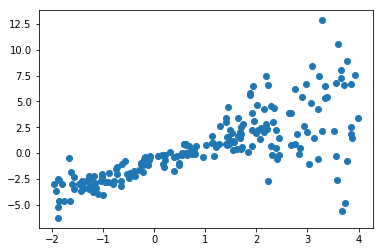

In [53]:
# 模拟数据
import numpy as np
np.random.seed(0)
import matplotlib.pylab as plt

def make_random_data():
    x = np.random.uniform(low=-2, high=4, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5+t*t/3), size=None)
        y.append(r)

    return x, 1.726*x - 0.84 + np.array(y)

x, y = make_random_data()
plt.plot(x, y, 'o')

Epoch 0: 12.223012924194336
Epoch 500: 4.5250043869018555
Epoch 1000: 4.302859306335449
Epoch 1500: 4.254983901977539
Epoch 2000: 4.244548797607422
Epoch 2500: 4.242274284362793
Epoch 3000: 4.241778373718262
Epoch 3500: 4.241670608520508
Epoch 4000: 4.241646766662598
Epoch 4500: 4.241641998291016


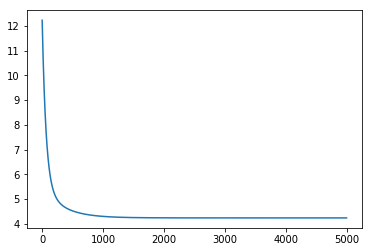

In [54]:
## 训练模型
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

n_epochs = 5000
training_costs = []
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    ## train the model for n_epoches
    for e in range(n_epochs):
        c, _ = sess.run([cost, train_op], feed_dict={tf_x:x_train, tf_y:y_train})
        
        training_costs.append(c)
        if not e % 500:
            print(f"Epoch {e}: {c}")

plt.plot(training_costs)

### 3.4.1. <a id='toc3_4_1_'></a>[存储和恢复模型参数](#toc0_)
#### 3.4.1.1. <a id='toc3_4_1_1_'></a>[存储](#toc0_)
```
tf.train.Saver()
```

In [65]:
with g.as_default():
    saver = tf.train.Saver()

n_epochs = 500
training_costs = []
with tf.Session(graph=g) as sess:
    # 初始化所有参数
    sess.run(tf.global_variables_initializer())

    ## train the model for n_epochs
    for e in range(n_epochs):
        c, _ = sess.run([cost, train_op], feed_dict={tf_x:x_train, tf_y:y_train})
        training_costs.append(c)
        if not e%50:
            print(f"Epoch {e}: {c}")
    saver.save(sess, './tensorflow_model/trained-model')


Epoch 0: 12.223012924194336
Epoch 50: 8.38757038116455
Epoch 100: 6.5721001625061035
Epoch 150: 5.6843767166137695
Epoch 200: 5.226912975311279
Epoch 250: 4.972521781921387
Epoch 300: 4.8169426918029785
Epoch 350: 4.711896896362305
Epoch 400: 4.634660243988037
Epoch 450: 4.574225425720215


In [64]:
!dir tensorflow_model

 ������ D �еľ��� Data
 �������к��� E222-400A

 d:\WorkStation\PyhtonWorkStation\SmallTools\Library\0041-LearnAlphaFlod\MLP\tensorflow_model ��Ŀ¼

2023/10/27  15:17    <DIR>          .
2023/10/27  15:16    <DIR>          ..
2023/10/27  15:17                83 checkpoint
2023/10/27  15:17                 8 trained-model.data-00000-of-00001
2023/10/27  15:17               150 trained-model.index
2023/10/27  15:17            30,617 trained-model.meta
               4 ���ļ�         30,858 �ֽ�
               2 ��Ŀ¼ 174,834,266,112 �����ֽ�


#### 3.4.1.2. <a id='toc3_4_1_2_'></a>[恢复](#toc0_)
```
tf.train.import_meta_graph()
```

In [71]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./tensorflow_model/trained-model.meta')

g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph('./tensorflow_model/trained-model.meta')
    new_saver.restore(sess, './tensorflow_model/trained-model')

    y_pred = sess.run('y_hat:0', feed_dict={'tf_x:0':x_test})

INFO:tensorflow:Restoring parameters from ./tensorflow_model/trained-model


In [ ]:
g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph('./tensorflow_model/trained-model.meta')
    new_saver.restore(sess, './tensorflow_model/trained-model')

    y_pred = sess.run('y_hat:0', feed_dict={'tf_x:0':x_test})